In [1]:
#import libs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline


In [2]:
Tran= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=[0])

In [3]:
Tran.head()


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
Tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null int64
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null float64
order_status               20000 non-null object
brand                      19803 non-null object
product_line               19803 non-null object
product_class              19803 non-null object
product_size               19803 non-null object
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 2.0+ MB


In [5]:
##Convert ##order_status	brand	product_line	product_class	product_size ## to ##category
#cats 
Tran['online_order'].replace({0:'No',1:'Yes'},inplace=True)
Tran_col=['order_status','brand','product_line','product_class','product_size','product_id','online_order']
for item in Tran_col:
    Tran[item]=Tran[item].astype('category')
#     Tran[item]=Tran[item].fillna(Tran[item].mode()[0])

print(Tran.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null category
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null category
order_status               20000 non-null category
brand                      19803 non-null category
product_line               19803 non-null category
product_class              19803 non-null category
product_size               19803 non-null category
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null float64
dtypes: category(7), datetime64[ns](1), float64(3), int64(2)
memory usage: 1.1 MB
None


In [6]:
Tran.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [8]:
# Tran['product_first_sold_date']=Tran['product_first_sold_date'].fillna(Tran['product_first_sold_date'].mode()[0])

In [9]:
# Tran['standard_cost']=Tran['standard_cost'].fillna(Tran['standard_cost'].mean())

In [10]:
Tran.isnull().sum()


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [11]:
# Tran.describe()

In [12]:
# Tran.describe(include='object')

In [13]:
df1= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=[0])
df2= pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=[0])

old_customer=pd.merge(df1, df2, on='customer_id')



In [14]:
print(old_customer.shape)
old_customer.head()

(3996, 18)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,ðµ ð ð ð,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [15]:
today=pd.to_datetime('today').date().year
old_customer['age'] = today-pd.DatetimeIndex(old_customer['DOB']).year

In [16]:
old_customer.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation,age
3991,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,0 Transport Center,3977,VIC,Australia,6,45.0
3992,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,4 Dovetail Crossing,2350,NSW,Australia,2,19.0
3993,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,736 Roxbury Junction,2540,NSW,Australia,6,NaN
3994,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,1482 Hauk Trail,3064,VIC,Australia,3,47.0
3995,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0,57042 Village Green Point,4511,QLD,Australia,6,29.0


In [17]:
del old_customer['DOB']


In [18]:
del old_customer['default']


In [19]:
old_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 17 columns):
customer_id                            3996 non-null int64
first_name                             3996 non-null object
last_name                              3871 non-null object
gender                                 3996 non-null object
past_3_years_bike_related_purchases    3996 non-null int64
job_title                              3492 non-null object
job_industry_category                  3341 non-null object
wealth_segment                         3996 non-null object
deceased_indicator                     3996 non-null object
owns_car                               3996 non-null object
tenure                                 3909 non-null float64
address                                3996 non-null object
postcode                               3996 non-null int64
state                                  3996 non-null object
country                                3996 non-null ob

In [20]:
old_customer.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
age                                     87
dtype: int64

In [21]:
print(old_customer['age'].min())
print(old_customer['age'].max())
print(today-old_customer['age'].max())


18.0
177.0
1843.0


In [23]:
old_customer.replace({177: 77},inplace=True)
print(old_customer.loc[old_customer['age']==177])


Empty DataFrame
Columns: [customer_id, first_name, last_name, gender, past_3_years_bike_related_purchases, job_title, job_industry_category, wealth_segment, deceased_indicator, owns_car, tenure, address, postcode, state, country, property_valuation, age]
Index: []


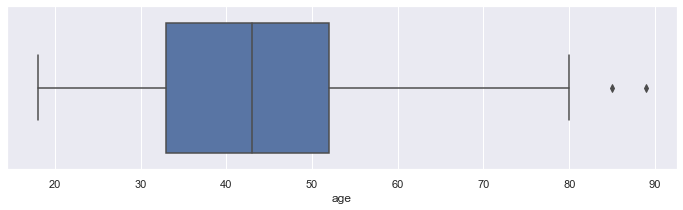

In [24]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='age', data=old_customer)


In [25]:
# old_customer['age']=old_customer['age'].fillna(old_customer['age'].median())


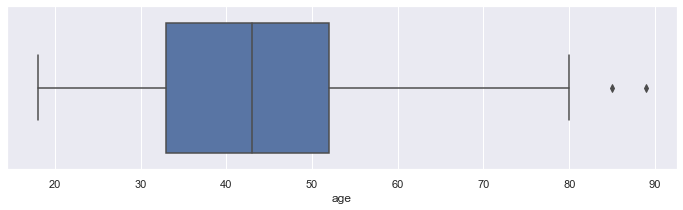

In [26]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.boxplot(x='age', data=old_customer)


In [27]:

cat_customer_col=['job_industry_category','wealth_segment','deceased_indicator','owns_car','state','job_title','gender']
for item in cat_customer_col:
    old_customer[item]=old_customer[item].astype('category')
#     old_customer[item]=old_customer[item].fillna(old_customer[item].mode()[0])

print(old_customer.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 17 columns):
customer_id                            3996 non-null int64
first_name                             3996 non-null object
last_name                              3871 non-null object
gender                                 3996 non-null category
past_3_years_bike_related_purchases    3996 non-null int64
job_title                              3492 non-null category
job_industry_category                  3341 non-null category
wealth_segment                         3996 non-null category
deceased_indicator                     3996 non-null category
owns_car                               3996 non-null category
tenure                                 3909 non-null float64
address                                3996 non-null object
postcode                               3996 non-null int64
state                                  3996 non-null category
country                                39

In [28]:
old_customer.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
job_title                              504
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
age                                     87
dtype: int64

In [29]:
col_customer=old_customer.columns.tolist()
for item in col_customer:
    if len(old_customer[item].unique()) < 16:
        print("unique in:",item,old_customer[item].unique())
#unique in: gender ['Male' 'Female' 'U']
    

unique in: gender [F, Male, Female, U, Femal, M]
Categories (6, object): [F, Male, Female, U, Femal, M]
unique in: job_industry_category [Health, Financial Services, IT, NaN, Retail, Argiculture, Property, Manufacturing, Telecommunications, Entertainment]
Categories (9, object): [Health, Financial Services, IT, Retail, ..., Property, Manufacturing, Telecommunications, Entertainment]
unique in: wealth_segment [Mass Customer, Affluent Customer, High Net Worth]
Categories (3, object): [Mass Customer, Affluent Customer, High Net Worth]
unique in: deceased_indicator [N, Y]
Categories (2, object): [N, Y]
unique in: owns_car [Yes, No]
Categories (2, object): [Yes, No]
unique in: state [New South Wales, QLD, VIC, NSW, Victoria]
Categories (5, object): [New South Wales, QLD, VIC, NSW, Victoria]
unique in: country ['Australia']
unique in: property_valuation [10  9  4 12  8  6  7  3  5 11  1  2]


In [30]:
def Replace_value(df, col, value, revalue):
    df[col].replace(value,revalue,inplace =True)
    return df[col].unique()

In [31]:
Replace_value(old_customer, 'gender', 'F', 'Female')
Replace_value(old_customer, 'gender', 'M', 'Male')
Replace_value(old_customer, 'gender', 'Femal', 'Female')
Replace_value(old_customer, 'gender', 'U', 'Unknown')
Replace_value(old_customer, 'state', 'New South Wales', 'NSW')
Replace_value(old_customer, 'state', 'Victoria', 'VIC')


[NSW, QLD, VIC]
Categories (3, object): [NSW, QLD, VIC]

In [32]:
old_customer.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 17 columns):
customer_id                            3996 non-null int64
first_name                             3996 non-null object
last_name                              3871 non-null object
gender                                 3996 non-null object
past_3_years_bike_related_purchases    3996 non-null int64
job_title                              3492 non-null category
job_industry_category                  3341 non-null category
wealth_segment                         3996 non-null category
deceased_indicator                     3996 non-null category
owns_car                               3996 non-null category
tenure                                 3909 non-null float64
address                                3996 non-null object
postcode                               3996 non-null int64
state                                  3996 non-null category
country                                3996

In [39]:
old_customer.to_csv('old_customer.csv',index=False)

In [40]:
Tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null category
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null category
order_status               20000 non-null category
brand                      19803 non-null category
product_line               19803 non-null category
product_class              19803 non-null category
product_size               19803 non-null category
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: category(7), datetime64[ns](2), float64(2), int64(2)
memory usage: 1.1 MB


In [38]:
Tran.to_csv('transaction.csv',index=False)
Tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
transaction_id             20000 non-null int64
product_id                 20000 non-null category
customer_id                20000 non-null int64
transaction_date           20000 non-null datetime64[ns]
online_order               19640 non-null category
order_status               20000 non-null category
brand                      19803 non-null category
product_line               19803 non-null category
product_class              19803 non-null category
product_size               19803 non-null category
list_price                 20000 non-null float64
standard_cost              19803 non-null float64
product_first_sold_date    19803 non-null datetime64[ns]
dtypes: category(7), datetime64[ns](2), float64(2), int64(2)
memory usage: 1.1 MB


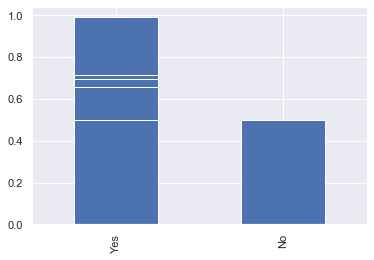

In [36]:
for item in Tran_col:
    Tran[item].value_counts(sort=True,normalize=True).plot(kind='bar')

In [37]:
Tran_col=['order_status','brand','product_line','product_class','product_size','product_id','online_order']
for item in Tran_col:
    counts=Tran.groupby(by=[item])['product_id'].count()/20000
    print(counts)
    

order_status
Approved     0.99105
Cancelled    0.00895
Name: product_id, dtype: float64
brand
Giant Bicycles    0.16560
Norco Bicycles    0.14550
OHM Cycles        0.15215
Solex             0.21265
Trek Bicycles     0.14950
WeareA2B          0.16475
Name: product_id, dtype: float64
product_line
Mountain    0.02115
Road        0.19850
Standard    0.70880
Touring     0.06170
Name: product_id, dtype: float64
product_class
high      0.15065
low       0.14820
medium    0.69130
Name: product_id, dtype: float64
product_size
large     0.19880
medium    0.64950
small     0.14185
Name: product_id, dtype: float64
product_id
0      0.06890
1      0.01555
2      0.01200
3      0.01770
4      0.01205
        ...   
96     0.00805
97     0.00710
98     0.00780
99     0.00760
100    0.00650
Name: product_id, Length: 101, dtype: float64
online_order
No     0.49055
Yes    0.49145
Name: product_id, dtype: float64


In [ ]:
# df.to_pickle(file_name)